#### Word Cloud utilities

In [1]:
# Bill Nicholson
# nicholdw@ucmail.uc.edu

In [2]:
# https://pypi.org/project/wordcloud/
#!pip install wordcloud
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random
from wordcloud import WordCloud, STOPWORDS

In [3]:
class Wordcloud:
    """
    Wordcloud Utilities
    """
    def generate(self, text):
        # Generate a word cloud image
        wordcloud = WordCloud().generate(text)

        # Display the generated image:
        # the matplotlib way:
        import matplotlib.pyplot as plt
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

        # lower max_font_size
        wordcloud = WordCloud(max_font_size=40).generate(text)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

    def generate01(self, benchmark_name, text, myStopwords = None, file_name = "wordcloud"):

        def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
            return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
        
        stopwords = set(STOPWORDS)
        """
        # Add some default stopwords specific to the text
        stopwords.add("one")
        stopwords.add("said")
        stopwords.add("will")
        stopwords.add("little")
        stopwords.add("now")
        stopwords.add("well")
        stopwords.add("see")
        stopwords.add("must")
        stopwords.add("time")
        #print(stopwords)
        """
        if myStopwords != None:
            for word in myStopwords:
                stopwords.add(word)
                
        wc = WordCloud(width=1600, height=800, random_state=42, colormap="viridis").generate(text)
        
        #wc = WordCloud(max_words=10, stopwords=stopwords, margin=10, random_state=1).generate(text)
        # store default colored image
        default_colors = wc.to_array()
        #plt.title("Word Cloud")
        #plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
        #plt.imshow(wc.recolor(random_state=3), interpolation="bilinear")
        plt.axis("off")
        plt.figure(figsize=(15, 10))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        wc.to_file(".\\" + benchmark_name + "\\results\\" + file_name + ".png")
        #plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '.\\Dummy Benchmark\\results\\test01.png'

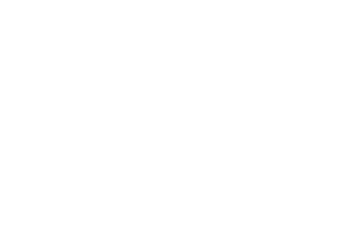

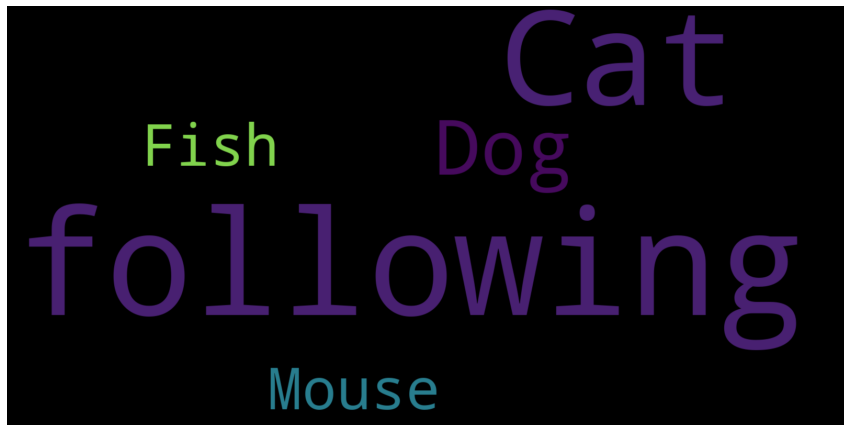

In [4]:
if __name__ == "__main__":
    wordcloud = Wordcloud()
    # Generate a word cloud using a few strategically chosen words
    text = "following following following following following following following following following following following following following following following the the the the the the the the the the Cat Cat Cat Cat Cat Cat Cat cat cat cat cat cat Dog Dog Mouse Fish"
    wordcloud.generate01("Dummy Benchmark", text, file_name = "test01")

    # Generate a word cloud using a book, Jane Eyre: An Autobiography
    # https://www.gutenberg.org/cache/epub/1260/pg1260.txt
    with open("pg1260.txt","r") as f:
        text = f.read()
    wordcloud.generate01("Dummy Benchmark", text, file_name = "test02")
